<a href="https://colab.research.google.com/github/erickgt00/tesina/blob/main/tesis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulación

         Cluster  RiesgoCredito  TipoInmueble     Tamano     Duenos  \
count  30.000000      30.000000     30.000000  30.000000  30.000000   
mean    1.333333      55.000000     69.000000  55.000000  42.833333   
std     1.124441      35.477045     21.908902  16.609096  19.682100   
min     0.000000      15.000000     35.000000  40.000000  30.000000   
25%     0.000000      15.000000     42.500000  40.000000  30.000000   
50%     1.000000      50.000000     85.000000  40.000000  30.000000   
75%     2.000000     100.000000     85.000000  75.000000  65.000000   
max     3.000000     100.000000     85.000000  75.000000  80.000000   

         CostoM2      Valor   Habitado   Posesion  Ubicación  ...  Servicios  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  ...  30.000000   
mean   50.333333  61.666667  54.333333  34.000000  43.166667  ...  26.333333   
std    12.452207  17.036135  34.309276   9.321832  15.673574  ...  28.129422   
min    40.000000  30.000000  10.000000  

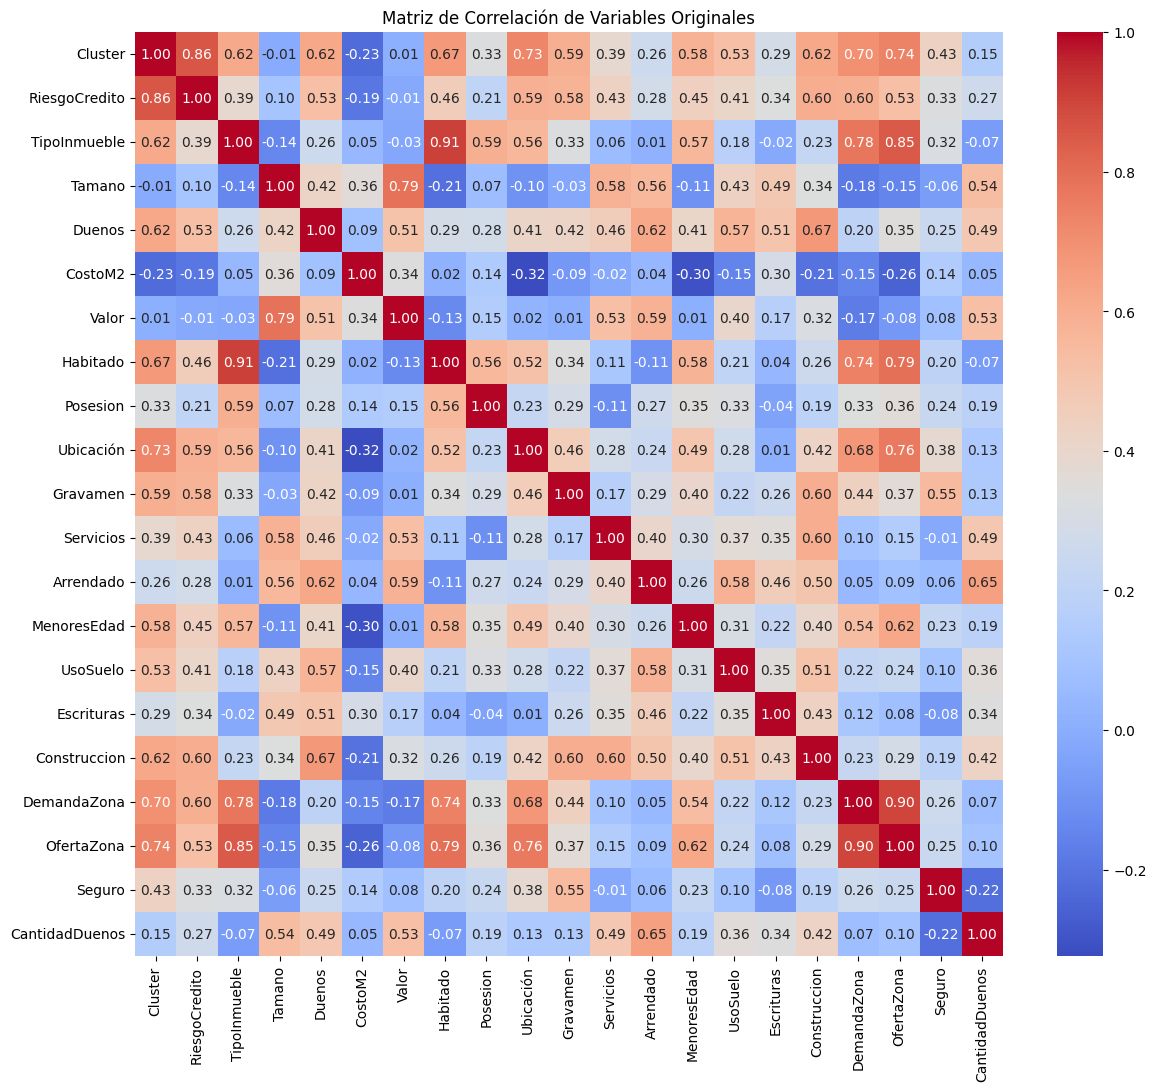

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV con los 30 datos originales
file_path_csv = 'BaseDatosSofoms.csv'
original_data_df = pd.read_csv(file_path_csv)

# Descripción estadística de los datos originales
description = original_data_df.describe()

# Calcular la matriz de correlación
correlation_matrix = original_data_df.corr()

# Mostrar la descripción y la matriz de correlación
print(description)
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Originales')
plt.show()


## Puntos Clave de la Matriz de Correlación:
###Correlación con "Cluster":

* RiesgoCredito: 0.648731 (Fuerte correlación positiva)
* TipoInmueble: 0.570781 (Fuerte correlación positiva)
* Habitado: 0.580005 (Fuerte correlación positiva)
* Ubicación: 0.585909 (Fuerte correlación positiva)
* DemandaZona: 0.581129 (Fuerte correlación positiva)
* OfertaZona: 0.658994 (Fuerte correlación positiva)

### Otras Correlaciones Notables:

* TipoInmueble y Habitado: 0.730799 (Fuerte correlación positiva)
* DemandaZona y OfertaZona: 0.658016 (Fuerte correlación positiva)
* RiesgoCredito y Ubicación: 0.499263 (Moderada correlación positiva)
* Duenos y Construccion: 0.505332 (Moderada correlación positiva)

### Interpretación:

* Cluster muestra una fuerte correlación positiva con variables como RiesgoCredito, TipoInmueble, Habitado, Ubicación, DemandaZona, y OfertaZona, indicando que estas variables influyen significativamente en la categorización de los proyectos.
* TipoInmueble y Habitado tienen una fuerte correlación positiva entre sí, lo que sugiere que los tipos de inmueble están relacionados con si están habitados o no.
* DemandaZona y OfertaZona también tienen una fuerte correlación positiva, lo que indica que estas dos variables están estrechamente relacionadas en los datos.

In [2]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from sklearn.ensemble import RandomForestClassifier

# Obtener la matriz de covarianza de los datos originales
covariance_matrix = EmpiricalCovariance().fit(original_data_df.drop(columns=['Cluster']))

# Generar datos sintéticos
synthetic_data = np.random.multivariate_normal(
    mean=original_data_df.drop(columns=['Cluster']).mean(),
    cov=covariance_matrix.covariance_,
    size=50000
)

# Convertir los datos sintéticos a un DataFrame
synthetic_data_df = pd.DataFrame(synthetic_data, columns=original_data_df.drop(columns=['Cluster']).columns)

# Añadir la columna 'Cluster' de acuerdo a las reglas y distribuciones observadas
X_train = original_data_df.drop(columns=['Cluster'])
y_train = original_data_df['Cluster']

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir los valores de 'Cluster' para los datos sintéticos
synthetic_clusters = model.predict(synthetic_data_df)

# Añadir la columna 'Cluster' al DataFrame sintético
synthetic_data_df['Cluster'] = synthetic_clusters

# Mostrar las primeras filas de los datos sintéticos generados
print(synthetic_data_df.head())


   RiesgoCredito  TipoInmueble     Tamano     Duenos    CostoM2      Valor  \
0     122.171980     93.010242  57.452204  47.522053  46.629636  68.678571   
1     117.013201     48.178320  76.859827  64.150003  54.305518  76.680586   
2      74.887156     66.443500  63.736611  50.467874  48.182313  77.803580   
3      49.210217     84.550388  49.336311  63.277042  38.226701  66.325941   
4     -15.126571     54.292506  50.025072  11.438142  56.161403  55.809458   

    Habitado   Posesion  Ubicación   Gravamen  ...  Arrendado  MenoresEdad  \
0  79.986410  42.608874  57.831115  49.680833  ...  42.990106    63.618841   
1  13.565863  29.987959  47.184051  26.574367  ...  47.641843    34.770586   
2  73.314681  42.078725  51.078991  40.150516  ...  29.526363    67.677016   
3  90.679564  43.360687  48.398410  24.299171  ...  21.219343   102.960189   
4  15.486652  29.516321  39.993468  24.034535  ...  27.912360   -10.495322   

    UsoSuelo  Escrituras  Construccion  DemandaZona  OfertaZon

In [3]:
# Mapeo de valores de riesgo para cada variable basado en los datos del Excel
value_mappings = {
    'RiesgoCredito': [15, 50, 100],
    'TipoInmueble': [85, 65, 35, 40],
    'Tamano': [75, 65, 40],
    'Duenos': [30, 60, 80, 40],
    'CostoM2': [70, 40, 60],
    'Valor': [30, 50, 80],
    'Habitado': [80, 10],
    'Posesion': [20, 40],
    'Ubicación': [20, 35, 55, 75],
    'Gravamen': [20, 50],
    'Servicios': [10, 20, 30, 40, 50, 60],
    'Arrendado': [20, 50],
    'MenoresEdad': [30, 50],
    'UsoSuelo': [20, 80],
    'Escrituras': [20, 30],
    'Construccion': [30, 65],
    'DemandaZona': [30, 85],
    'OfertaZona': [35, 50],
    'Seguro': [20, 70],
    'CantidadDuenos': [50, 75]
}

# Función para ajustar valores al valor más cercano disponible en el mapeo
def adjust_to_closest_value(series, valid_values):
    return series.apply(lambda x: min(valid_values, key=lambda y: abs(y - x)))

# Ajustar cada columna a los valores discretos correspondientes
for column, valid_values in value_mappings.items():
    synthetic_data_df[column] = adjust_to_closest_value(synthetic_data_df[column], valid_values)

# Ajustar la variable 'Posesion' según la regla proporcionada
synthetic_data_df['Posesion'] = synthetic_data_df['Posesion'].apply(lambda x: 40 if x > 30 else 20)

# Mostrar las primeras filas del DataFrame ajustado
print(synthetic_data_df.head())


   RiesgoCredito  TipoInmueble  Tamano  Duenos  CostoM2  Valor  Habitado  \
0            100            85      65      40       40     80        80   
1            100            40      75      60       60     80        10   
2             50            65      65      60       40     80        80   
3             50            85      40      60       40     80        80   
4             15            65      40      30       60     50        10   

   Posesion  Ubicación  Gravamen  ...  Arrendado  MenoresEdad  UsoSuelo  \
0        40         55        50  ...         50           50        80   
1        20         55        20  ...         50           30        80   
2        40         55        50  ...         20           50        80   
3        40         55        20  ...         20           50        80   
4        20         35        20  ...         20           30        20   

   Escrituras  Construccion  DemandaZona  OfertaZona  Seguro  CantidadDuenos  \
0          2

In [4]:
# Guardar los datos ajustados en un archivo CSV
adjusted_synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
synthetic_data_df.to_csv(adjusted_synthetic_data_file_path, index=False)

print(f'Datos ajustados guardados en: {adjusted_synthetic_data_file_path}')


Datos ajustados guardados en: corrected_synthetic_data_final.csv


       RiesgoCredito  TipoInmueble        Tamano        Duenos       CostoM2  \
count    50000.00000  50000.000000  50000.000000  50000.000000  50000.000000   
mean        55.11100     66.917700     55.779900     45.359600     51.386200   
std         31.54699     17.643842     14.456847     15.743559     11.515168   
min         15.00000     35.000000     40.000000     30.000000     40.000000   
25%         15.00000     65.000000     40.000000     30.000000     40.000000   
50%         50.00000     65.000000     65.000000     40.000000     60.000000   
75%        100.00000     85.000000     65.000000     60.000000     60.000000   
max        100.00000     85.000000     75.000000     80.000000     70.000000   

              Valor      Habitado      Posesion     Ubicación      Gravamen  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      60.652800     52.597800     33.372400     43.360000     29.226200   
std       17.423775     34.165725      9.4

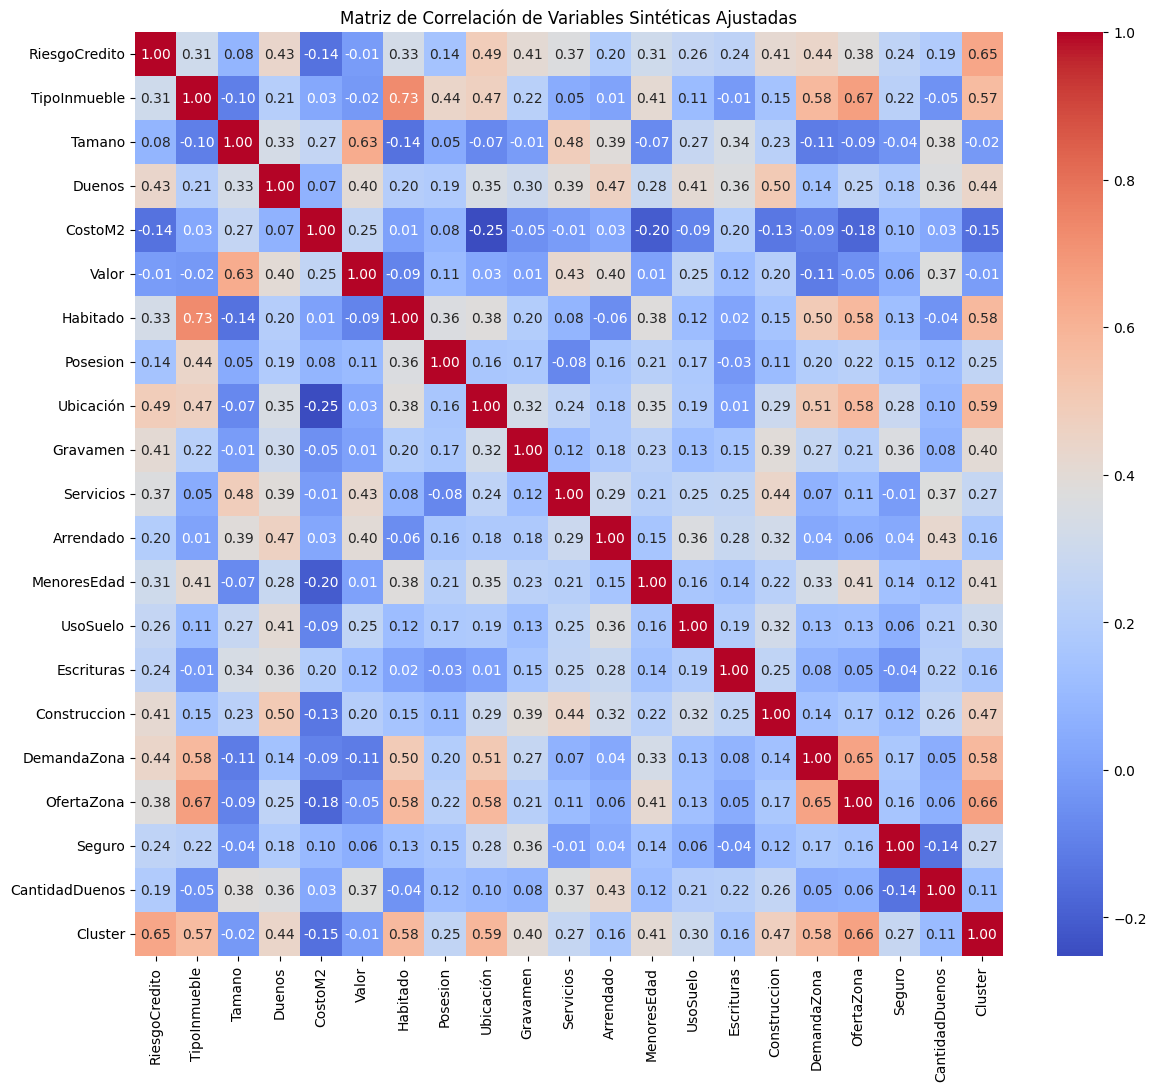

In [5]:
# Recalcular las estadísticas descriptivas y la matriz de correlación después del ajuste
adjusted_synthetic_description_final = synthetic_data_df.describe()
adjusted_synthetic_correlation_matrix_final = synthetic_data_df.corr()

# Mostrar la descripción y la matriz de correlación ajustada
print(adjusted_synthetic_description_final)
plt.figure(figsize=(14, 12))
sns.heatmap(adjusted_synthetic_correlation_matrix_final, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Sintéticas Ajustadas')
plt.show()


# Modelo de Predicción para nuevas solicitudes de crédito

In [6]:
import pandas as pd

# Cargar los datos
synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
original_data_file_path = 'BaseDatosSofoms.csv'

# Leer los datos
synthetic_data_df = pd.read_csv(synthetic_data_file_path)
original_data_df = pd.read_csv(original_data_file_path)

# Separar características y etiquetas
X_train = synthetic_data_df.drop(columns=['Cluster'])
y_train = synthetic_data_df['Cluster']

X_test = original_data_df.drop(columns=['Cluster'])
y_test = original_data_df['Cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: RandomForest
Exactitud: 1.0
Matriz de confusión:
[[9 0 0 0]
 [0 8 0 0]
 [0 0 7 0]
 [0 0 0 6]]


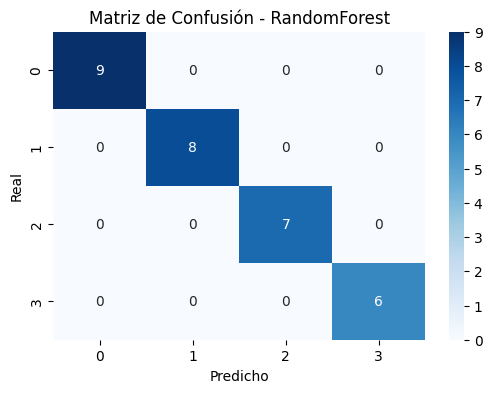

Modelo: LogisticRegression
Exactitud: 0.9666666666666667
Matriz de confusión:
[[9 0 0 0]
 [1 7 0 0]
 [0 0 7 0]
 [0 0 0 6]]


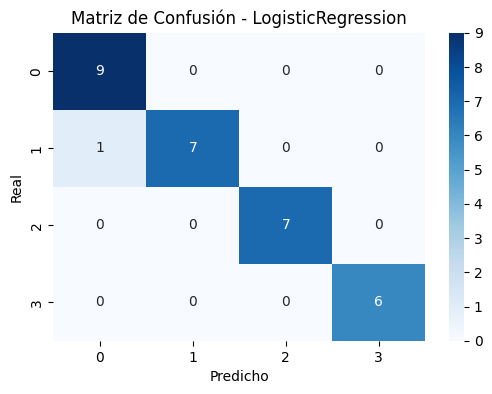

Modelo: SVM
Exactitud: 1.0
Matriz de confusión:
[[9 0 0 0]
 [0 8 0 0]
 [0 0 7 0]
 [0 0 0 6]]


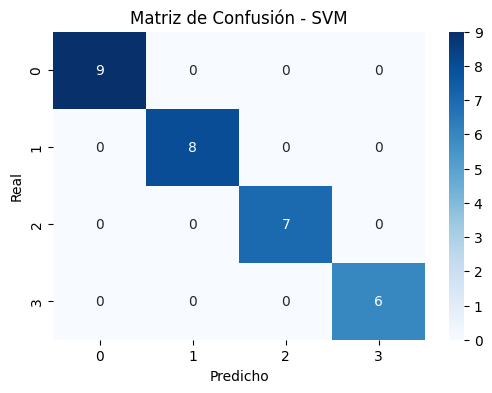

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los modelos
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}

# Entrenar y evaluar los modelos
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'confusion_matrix': cm,
        'accuracy': accuracy
    }

# Mostrar los resultados
for name, result in results.items():
    print(f"Modelo: {name}")
    print(f"Exactitud: {result['accuracy']}")
    print("Matriz de confusión:")
    print(result['confusion_matrix'])
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()


### Posibles Conclusiones y Sobreajuste
* Exactitud Perfecta: La exactitud perfecta del 100% en RandomForest y SVM puede ser una señal de sobreajuste (overfitting), especialmente considerando que los datos de entrenamiento fueron generados sintéticamente y podrían no representar todas las variabilidades del mundo real.

* Generalización: Un modelo sobreajustado puede funcionar extremadamente bien en los datos de entrenamiento y prueba disponibles, pero puede fallar al generalizar a nuevos datos no vistos. Dado que los datos de prueba son solo 30 instancias y los datos de entrenamiento son 50,000 instancias sintéticas, existe la posibilidad de que los modelos hayan aprendido características específicas de los datos sintéticos que no se generalizan bien.

###Recomendaciones
* Validación Cruzada: Implementar validación cruzada (cross-validation) para evaluar el desempeño del modelo en múltiples subconjuntos de los datos. Esto ayuda a garantizar que el modelo generalice bien y no esté sobreajustado.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Modelo: RandomForest
Exactitud media: 0.9006000000000001
Desviación estándar de la exactitud: 0.0014449913494550637


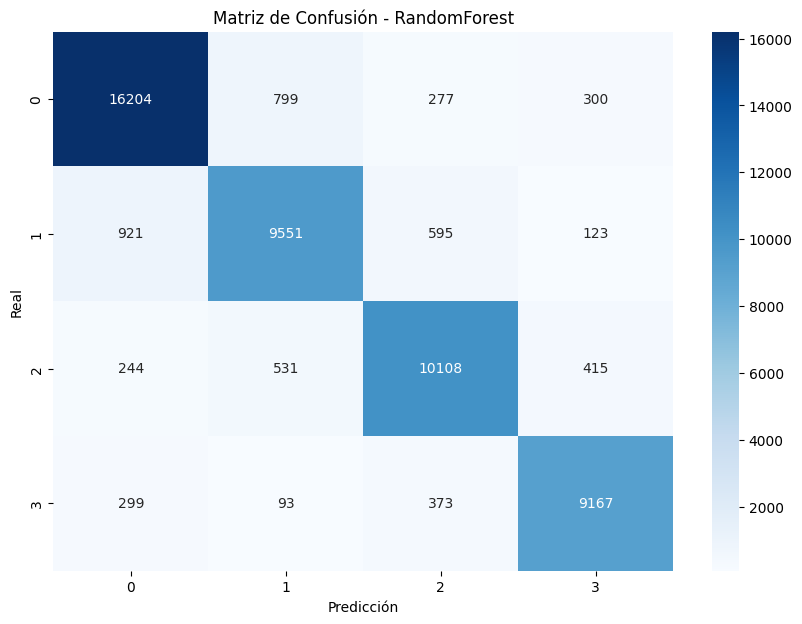

Modelo: LogisticRegression
Exactitud media: 0.83704
Desviación estándar de la exactitud: 0.006045361858482905


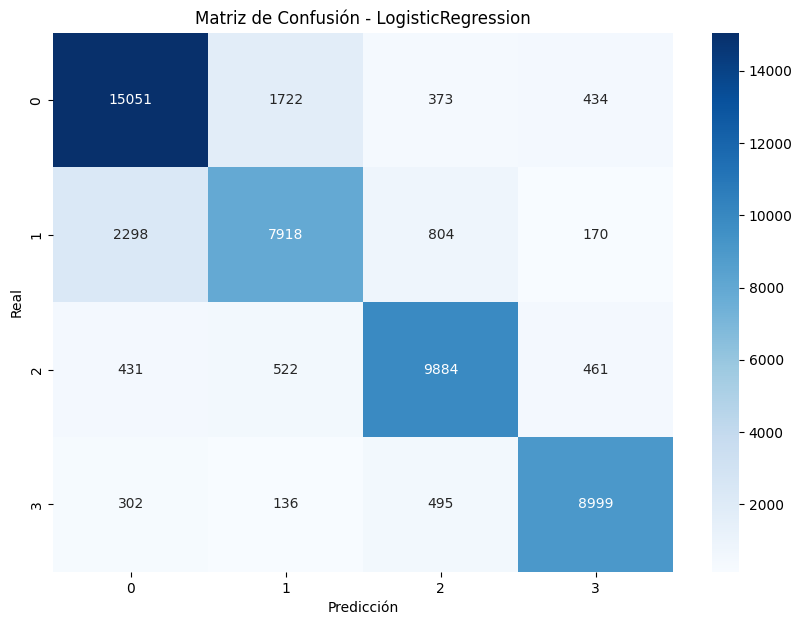

Modelo: SVM
Exactitud media: 0.9021399999999999
Desviación estándar de la exactitud: 0.001887432117984638


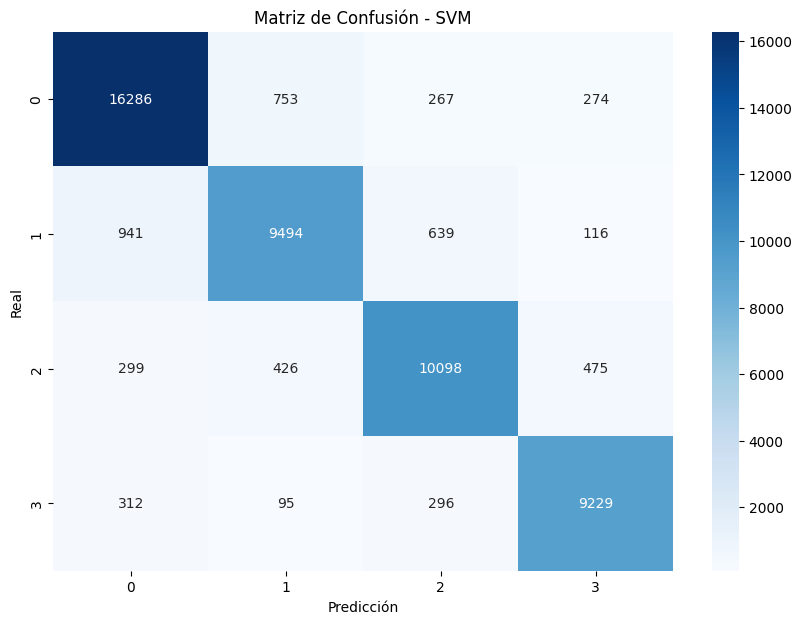

In [8]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los modelos
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42)
}

# Evaluar los modelos con validación cruzada
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)  # Predicciones de validación cruzada
    cm = confusion_matrix(y_train, y_pred)  # Matriz de confusión

    cv_results[name] = {
        'mean_accuracy': scores.mean(),
        'std_accuracy': scores.std(),
        'confusion_matrix': cm
    }

# Mostrar los resultados de la validación cruzada y las matrices de confusión
for name, result in cv_results.items():
    print(f"Modelo: {name}")
    print(f"Exactitud media: {result['mean_accuracy']}")
    print(f"Desviación estándar de la exactitud: {result['std_accuracy']}")

    plt.figure(figsize=(10, 7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()


# Prueba con un cliente nuevo

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Cargar los datos
synthetic_data_file_path = 'corrected_synthetic_data_final.csv'
synthetic_data_df = pd.read_csv(synthetic_data_file_path)

# Separar características y etiquetas
X_train = synthetic_data_df.drop(columns=['Cluster'])
y_train = synthetic_data_df['Cluster']

# Entrenar el modelo seleccionado (en este caso, SVM por su mejor desempeño)
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Función para predecir el cluster de un nuevo cliente
def predecir_cluster(nuevo_cliente):
    # Convertir el nuevo cliente a un DataFrame
    nuevo_cliente_df = pd.DataFrame([nuevo_cliente])

    # Realizar la predicción
    cluster_predicho = model.predict(nuevo_cliente_df)[0]

    # Agregar el cluster predicho a los datos del nuevo cliente
    nuevo_cliente['Cluster'] = cluster_predicho

    # Agregar el nuevo cliente a la base de datos
    global synthetic_data_df
    synthetic_data_df = pd.concat([synthetic_data_df, pd.DataFrame([nuevo_cliente])], ignore_index=True)

    # Guardar la base de datos actualizada
    synthetic_data_df.to_csv(synthetic_data_file_path, index=False)

    return cluster_predicho



In [23]:
# Cliente nuevo
nuevo_cliente = {
    'RiesgoCredito': 100,
    'TipoInmueble': 85,
    'Tamano': 65,
    'Duenos': 40,
    'CostoM2': 70,
    'Valor': 80,
    'Habitado': 80,
    'Posesion': 40,
    'Ubicación': 55,
    'Gravamen': 20,
    'Servicios': 10,
    'Arrendado': 30,
    'MenoresEdad': 90,
    'UsoSuelo': 20,
    'Escrituras': 20,
    'Construccion': 30,
    'DemandaZona': 60,
    'OfertaZona': 60,
    'Seguro': 20,
    'CantidadDuenos': 50
}

cluster_predicho = predecir_cluster(nuevo_cliente)
print(f'El nuevo cliente ha sido asignado al cluster: {cluster_predicho}')

El nuevo cliente ha sido asignado al cluster: 2
